In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/after_down_BTC3.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,BTC,down,2018-11-19 22:00:00,CryptoHourly,0,0,NaN,"@#1, Bitcoin with unit price of $4,830.75, mar..."
1,BTC,down,2018-11-19 22:00:00,IAM__Network,0,0,#SmartTechnologies #SmartLiving #ThingCoin #IC...,IAM Platform Curated Retweet: Via: https://twi...
2,BTC,down,2018-11-19 22:00:00,Ambitocom,2,6,#bitcoin #bitcoin,"El #bitcoin, en caída: en un año perdió 75% de..."
3,BTC,down,2018-11-19 22:00:00,ESPACIOBITVE,0,0,#Criptomonedas #Bitcoin #Bitcoin #BTC #BTC #ET...,El Reino Unido en estos momentos le está prest...
4,BTC,down,2018-11-19 22:00:00,CryptoGulp,0,1,NaN,Top 5 Cryptocurrencies - Current Prices $BTC: ...
...,...,...,...,...,...,...,...,...
3094,BTC,down,2018-11-19 23:59:43,jpdcosta,0,0,NaN,Gostei de um vídeo @YouTube http://youtu.be/Lj...
3095,BTC,down,2018-11-19 23:59:46,Web3Shane,0,1,#Twitter #Bitcoin #Bitcoin,#Twitter : #Bitcoin Scams Came from Third-Part...
3096,BTC,down,2018-11-19 23:59:48,Remi_Vladuceanu,3,6,#newsoftheweek #Bitcoin #Bitcoin #blockchain #...,Ripple’s CEO Says Blockchain Will Change the W...
3097,BTC,down,2018-11-19 23:59:52,bitcoin_social,0,0,NaN,"⁠Following the recent downtrend, some analysts..."


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=str(x) ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0       [@, 1, ,, bitcoin, with, unit, price, of, $, 4...
1       [iam, platform, curated, retweet, :, via, :, u...
2       [el, bitcoin, ,, en, caída, :, en, un, año, pe...
3       [el, reino, unido, en, estos, momentos, le, es...
4       [top, 5, cryptocurrencies, current, prices, $,...
                              ...                        
3094    [gostei, de, um, vídeo, @, youtube, ljaujrjmcf...
3095    [twitter, :, bitcoin, scams, came, from, third...
3096    [ripple, ’, s, ceo, says, blockchain, will, ch...
3097    [⁠following, the, recent, downtrend, ,, some, ...
3098    [o, preço, das, tulipas, caíram, para, zero, ,...
Name: text, Length: 3099, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0       [,, bitcoin, unit, price, $, ,, market, cap, $...
1       [iam, platform, curated, retweet, :, :, userex...
2       [el, bitcoin, ,, en, caída, :, en, un, año, pe...
3       [el, reino, unido, en, estos, momentos, le, es...
4       [top, cryptocurrencies, current, prices, $, bt...
                              ...                        
3094    [gostei, um, vídeo, @, youtube, ljaujrjmcfc, ?...
3095    [twitter, :, bitcoin, scams, came, third, part...
3096    [ripple, ’, ceo, says, blockchain, change, wor...
3097    [⁠following, recent, downtrend, ,, analysts, f...
3098    [preço, das, tulipas, caíram, para, zero, ,, v...
Name: text, Length: 3099, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
# text['text'] =  text['text'].apply(lambda x : [re.sub('[^a-zA-Z0-9]',' ',word).strip() for word in x])

In [19]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [20]:
article_contents = tokenized_doc.values.tolist()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [22]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [23]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [24]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [25]:
word2id = defaultdict(lambda: 0)

In [26]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [27]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [28]:
len(tf_idf_result)

6810

In [29]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

6810


In [30]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [31]:
sentences = article_contents

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

6810

In [35]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [37]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [38]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [39]:
temp_cluster_result['cluster'] = assigned_clusters

In [40]:
temp_cluster_result['raw_data'] = X.tolist()

In [41]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [42]:
from sklearn.metrics import pairwise_distances

In [43]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [44]:
len(cosine_centroid_list)

6810

In [45]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [46]:
sum(temp_distance[3])

322.43392669606925

In [47]:
import scipy.spatial.distance as dist

In [48]:
dist.cosine(X[0],cosine_centroid_list[0])

4.8238703073244515e-05

In [49]:
dist.euclidean(X[0],cosine_centroid_list[0])

6.619498133440082

In [50]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
781,"[-0.0219679307192564, -0.007617861498147249, 0...",venturecapital,0,"[-0.0020004676, -0.0014539149, 0.001698392, -0...",0.071222,0.004722,1.066500,NaN
1195,"[-0.008830778300762177, -0.008890310302376747,...",insanity,0,"[-0.0020004676, -0.0014539149, 0.001698392, -0...",0.076894,0.000497,1.076397,NaN
4697,"[-0.013281019404530525, -0.010278075002133846,...",pric,0,"[-0.0020004676, -0.0014539149, 0.001698392, -0...",0.111321,0.000249,1.111073,NaN
246,"[-0.010548434220254421, -0.003283051773905754,...",briefly,0,"[-0.0020004676, -0.0014539149, 0.001698392, -0...",0.112745,0.000746,1.111999,NaN
4499,"[-0.012739752419292927, -0.007914521731436253,...",changer,0,"[-0.0020004676, -0.0014539149, 0.001698392, -0...",0.127035,0.000249,1.126786,NaN
1827,"[-0.006536366883665323, -0.007588392123579979,...",trên,0,"[-0.0020004676, -0.0014539149, 0.001698392, -0...",0.131180,0.000497,1.130683,NaN
4674,"[-0.004247868433594704, -0.007813937030732632,...",dailycoin,0,"[-0.0020004676, -0.0014539149, 0.001698392, -0...",0.140396,0.000497,1.139899,NaN
3514,"[-0.004970463924109936, -0.0070740291848778725...",主要仮想通貨,0,"[-0.0020004676, -0.0014539149, 0.001698392, -0...",0.166078,0.000497,1.165581,NaN
3515,"[-0.003260887460783124, -0.0067719402723014355...",現在の価格,0,"[-0.0020004676, -0.0014539149, 0.001698392, -0...",0.175819,0.000497,1.175322,NaN
3061,"[-0.00743704941123724, -0.0059471819549798965,...",article=have,0,"[-0.0020004676, -0.0014539149, 0.001698392, -0...",0.194006,0.000249,1.193758,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1856,"[0.015689199790358543, 0.010151028633117676, -...",precharge,1,"[0.0047711125, 0.0029141288, -0.0031797846, 0....",0.060032,0.000746,1.059287,NaN
4966,"[0.011991013772785664, 0.007517520803958178, -...",rbenadon,1,"[0.0047711125, 0.0029141288, -0.0031797846, 0....",0.063536,0.000249,1.063288,NaN
2060,"[0.008904492482542992, 0.005560728255659342, -...",maul,1,"[0.0047711125, 0.0029141288, -0.0031797846, 0....",0.072035,0.000249,1.071786,NaN
5598,"[0.011427548713982105, 0.010491331107914448, -...",recommend,1,"[0.0047711125, 0.0029141288, -0.0031797846, 0....",0.076476,0.000497,1.075979,NaN
5316,"[0.016227683052420616, 0.006640623323619366, -...",lend,1,"[0.0047711125, 0.0029141288, -0.0031797846, 0....",0.077624,0.000497,1.077127,NaN
1240,"[0.009588838554918766, 0.004243484698235989, -...",whir,1,"[0.0047711125, 0.0029141288, -0.0031797846, 0....",0.078338,0.000249,1.078090,NaN
3697,"[0.010168394073843956, 0.012539399787783623, -...",cleaner,1,"[0.0047711125, 0.0029141288, -0.0031797846, 0....",0.084599,0.000249,1.084350,NaN
2050,"[0.006895731668919325, 0.00892314687371254, -0...",criptos,1,"[0.0047711125, 0.0029141288, -0.0031797846, 0....",0.088712,0.000249,1.088463,NaN
5916,"[0.01578124426305294, 0.01291317492723465, -0....",resold,1,"[0.0047711125, 0.0029141288, -0.0031797846, 0....",0.090044,0.000249,1.089796,NaN
3761,"[0.014882581308484077, 0.006144978106021881, -...",уровень,1,"[0.0047711125, 0.0029141288, -0.0031797846, 0....",0.091884,0.000249,1.091636,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2041,"[0.029648154973983765, 0.01905388943850994, -0...",اللينك,2,"[0.009679136, 0.0063838405, -0.0067612007, 0.0...",0.012472,0.000249,1.012224,NaN
2034,"[0.03482029214501381, 0.02162615768611431, -0....",مجرد,2,"[0.009679136, 0.0063838405, -0.0067612007, 0.0...",0.012632,0.000249,1.012383,NaN
2580,"[0.033465687185525894, 0.02620983123779297, -0...",piensa,2,"[0.009679136, 0.0063838405, -0.0067612007, 0.0...",0.013840,0.000497,1.013343,NaN
1721,"[0.02485768124461174, 0.020070791244506836, -0...",derive,2,"[0.009679136, 0.0063838405, -0.0067612007, 0.0...",0.016251,0.000746,1.015505,NaN
1668,"[0.02860238216817379, 0.02172846533358097, -0....",intention,2,"[0.009679136, 0.0063838405, -0.0067612007, 0.0...",0.016263,0.000497,1.015766,NaN
4362,"[0.026889530941843987, 0.024789249524474144, -...",plenty,2,"[0.009679136, 0.0063838405, -0.0067612007, 0.0...",0.017655,0.000746,1.016910,NaN
3995,"[0.028931953012943268, 0.01547042652964592, -0...",cyber,2,"[0.009679136, 0.0063838405, -0.0067612007, 0.0...",0.017638,0.000497,1.017141,NaN
3726,"[0.022791897878050804, 0.018828609958291054, -...",fácil,2,"[0.009679136, 0.0063838405, -0.0067612007, 0.0...",0.017705,0.000497,1.017208,NaN
4827,"[0.02661396749317646, 0.023959260433912277, -0...",vent,2,"[0.009679136, 0.0063838405, -0.0067612007, 0.0...",0.018019,0.000497,1.017522,NaN
1384,"[0.025373559445142746, 0.014193283393979073, -...",basato,2,"[0.009679136, 0.0063838405, -0.0067612007, 0.0...",0.018347,0.000497,1.017850,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[1.1949071884155273, 0.8550224900245667, -0.83...",bitcoin,3,"[0.03542722, 0.025580049, -0.024830353, 0.0090...",0.000048,0.932981,0.067067,NaN
11,"[0.5690094232559204, 0.40207940340042114, -0.3...",crypto,3,"[0.03542722, 0.025580049, -0.024830353, 0.0090...",0.000164,0.164030,0.836134,NaN
92,"[0.48192062973976135, 0.33996134996414185, -0....",cryptocurrency,3,"[0.03542722, 0.025580049, -0.024830353, 0.0090...",0.000221,0.113330,0.886891,NaN
12,"[0.6586112976074219, 0.4696260094642639, -0.45...",blockchain,3,"[0.03542722, 0.025580049, -0.024830353, 0.0090...",0.000141,0.109353,0.890788,NaN
2,"[0.3416631817817688, 0.24884988367557526, -0.2...",price,3,"[0.03542722, 0.025580049, -0.024830353, 0.0090...",0.000945,0.096927,0.904018,NaN
44,"[0.4647795259952545, 0.32682791352272034, -0.3...",ethereum,3,"[0.03542722, 0.025580049, -0.024830353, 0.0090...",0.000397,0.073316,0.927080,NaN
3,"[0.4433120787143707, 0.3092353045940399, -0.30...",market,3,"[0.03542722, 0.025580049, -0.024830353, 0.0090...",0.000221,0.059150,0.941071,NaN
41,"[0.38447558879852295, 0.26475250720977783, -0....",cash,3,"[0.03542722, 0.025580049, -0.024830353, 0.0090...",0.000281,0.057659,0.942623,NaN
83,"[0.48036396503448486, 0.3922463655471802, -0.4...",sell,3,"[0.03542722, 0.025580049, -0.024830353, 0.0090...",0.015800,0.067352,0.948448,NaN
256,"[0.4194164574146271, 0.2960323691368103, -0.29...",news,3,"[0.03542722, 0.025580049, -0.024830353, 0.0090...",0.000243,0.047966,0.952277,NaN


In [56]:
y_km = temp_cluster_result['cluster'].values

In [57]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

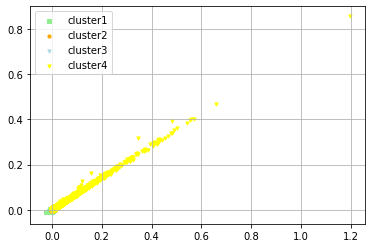

In [58]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 투자

156

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 부정

335

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 기타

1175

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 투자

5144

In [64]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 11 # 투자

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 2 # 부정

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 13 # 기타

In [68]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 11 # 투자

In [69]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [70]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [71]:
kmeans.inertia_

80.63162231445312

In [72]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 0 2 ... 0 0 0]


In [73]:
cluster_values= list(model.wv.vocab)

In [74]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-80.63162994384766


In [75]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [76]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7005178


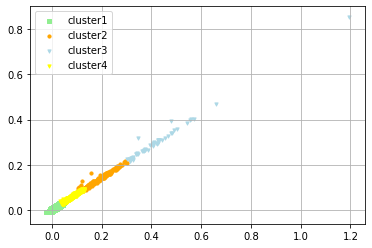

In [77]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [78]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [79]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [80]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [81]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [82]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [83]:
import scipy.spatial.distance as dist

In [84]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [85]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 기술한계

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3900,"[0.010962453670799732, 0.010174899362027645, -...",location,0,"[0.01426287, 0.010178609, -0.009922119, 0.0035...",0.024272,0.000497,1.023775,NaN
1882,"[0.01160100381821394, 0.012063009664416313, -0...",lightningnetwork,0,"[0.01426287, 0.010178609, -0.009922119, 0.0035...",0.024602,0.000497,1.024105,NaN
2125,"[0.011922834441065788, 0.008048174902796745, -...",livestream,0,"[0.01426287, 0.010178609, -0.009922119, 0.0035...",0.024856,0.000249,1.024608,NaN
5806,"[0.017962131649255753, 0.008208522573113441, -...",profesor,0,"[0.01426287, 0.010178609, -0.009922119, 0.0035...",0.025152,0.000249,1.024903,NaN
5525,"[0.0118026752024889, 0.01306652370840311, -0.0...",tendente,0,"[0.01426287, 0.010178609, -0.009922119, 0.0035...",0.025158,0.000249,1.024910,NaN
5720,"[0.01271298248320818, 0.012239666655659676, -0...",nekaj,0,"[0.01426287, 0.010178609, -0.009922119, 0.0035...",0.025234,0.000249,1.024986,NaN
895,"[0.013101879507303238, 0.013129223138093948, -...",baksanıza,0,"[0.01426287, 0.010178609, -0.009922119, 0.0035...",0.025299,0.000249,1.025051,NaN
4600,"[0.01640648953616619, 0.01268365141004324, -0....",lobbyist,0,"[0.01426287, 0.010178609, -0.009922119, 0.0035...",0.025478,0.000249,1.025230,NaN
6753,"[0.016630984842777252, 0.013669516891241074, -...",ធ្លាក់ថ្លៃពេញមួយឆ្នាំ,0,"[0.01426287, 0.010178609, -0.009922119, 0.0035...",0.025541,0.000249,1.025292,NaN
6134,"[0.014324614778161049, 0.010738864541053772, -...",detrimental,0,"[0.01426287, 0.010178609, -0.009922119, 0.0035...",0.025791,0.000249,1.025542,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
493,"[0.18832656741142273, 0.13473199307918549, -0....",watch,1,"[0.18679401, 0.13529377, -0.13223398, 0.048634...",0.030394,0.008699,1.021695,NaN
159,"[0.18404720723628998, 0.1379953771829605, -0.1...",base,1,"[0.18679401, 0.13529377, -0.13223398, 0.048634...",0.030012,0.007704,1.022307,NaN
247,"[0.19177846610546112, 0.13173893094062805, -0....",drop,1,"[0.18679401, 0.13529377, -0.13223398, 0.048634...",0.058365,0.031812,1.026554,NaN
4,"[0.18314112722873688, 0.13683316111564636, -0....",platform,1,"[0.18679401, 0.13529377, -0.13223398, 0.048634...",0.031781,0.004971,1.026810,NaN
1389,"[0.18981803953647614, 0.13013075292110443, -0....",profit,1,"[0.18679401, 0.13529377, -0.13223398, 0.048634...",0.034457,0.005716,1.028740,NaN
109,"[0.1833377480506897, 0.12909947335720062, -0.1...",dash,1,"[0.18679401, 0.13529377, -0.13223398, 0.048634...",0.037379,0.008201,1.029178,NaN
517,"[0.18783476948738098, 0.13644860684871674, -0....",game,1,"[0.18679401, 0.13529377, -0.13223398, 0.048634...",0.036126,0.006213,1.029913,NaN
548,"[0.19495554268360138, 0.1426486223936081, -0.1...",data,1,"[0.18679401, 0.13529377, -0.13223398, 0.048634...",0.036458,0.005468,1.030991,NaN
1581,"[0.188171848654747, 0.1345875859260559, -0.132...",strong,1,"[0.18679401, 0.13529377, -0.13223398, 0.048634...",0.041011,0.009941,1.031070,NaN
352,"[0.1921968162059784, 0.13773372769355774, -0.1...",early,1,"[0.18679401, 0.13529377, -0.13223398, 0.048634...",0.037318,0.005468,1.031851,NaN


In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
256,"[0.4194164574146271, 0.2960323691368103, -0.29...",news,2,"[0.41709793, 0.2998334, -0.29544204, 0.1071800...",0.058083,0.047966,1.010116,NaN
107,"[0.4226028025150299, 0.2933756709098816, -0.29...",ripple,2,"[0.41709793, 0.2998334, -0.29544204, 0.1071800...",0.058938,0.039019,1.019919,NaN
104,"[0.4253711402416229, 0.2974284887313843, -0.29...",time,2,"[0.41709793, 0.2998334, -0.29544204, 0.1071800...",0.077524,0.045481,1.032043,NaN
329,"[0.4078841209411621, 0.29267776012420654, -0.2...",good,2,"[0.41709793, 0.2998334, -0.29544204, 0.1071800...",0.063602,0.019137,1.044465,NaN
377,"[0.42459970712661743, 0.31022214889526367, -0....",network,2,"[0.41709793, 0.2998334, -0.29544204, 0.1071800...",0.062390,0.017646,1.044745,NaN
34,"[0.41146743297576904, 0.29935580492019653, -0....",criptomonedas,2,"[0.41709793, 0.2998334, -0.29544204, 0.1071800...",0.062324,0.015160,1.047164,NaN
216,"[0.43224233388900757, 0.31034794449806213, -0....",exchange,2,"[0.41709793, 0.2998334, -0.29544204, 0.1071800...",0.068765,0.021374,1.047392,NaN
636,"[0.4263579547405243, 0.3083634376525879, -0.30...",para,2,"[0.41709793, 0.2998334, -0.29544204, 0.1071800...",0.060038,0.010687,1.049351,NaN
3,"[0.4433120787143707, 0.3092353045940399, -0.30...",market,2,"[0.41709793, 0.2998334, -0.29544204, 0.1071800...",0.110007,0.059150,1.050857,NaN
389,"[0.40755581855773926, 0.28447023034095764, -0....",year,2,"[0.41709793, 0.2998334, -0.29544204, 0.1071800...",0.086327,0.034794,1.051533,NaN


In [89]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1256,"[0.07249890267848969, 0.0516936257481575, -0.0...",solve,3,"[0.07006663, 0.050316747, -0.048944183, 0.0177...",0.026671,0.001740,1.024932,NaN
1738,"[0.06960567086935043, 0.05272738263010979, -0....",manager,3,"[0.07006663, 0.050316747, -0.048944183, 0.0177...",0.027863,0.002237,1.025627,NaN
706,"[0.0675520971417427, 0.0497472770512104, -0.04...",repeat,3,"[0.07006663, 0.050316747, -0.048944183, 0.0177...",0.028556,0.001988,1.026568,NaN
1021,"[0.07080107182264328, 0.05263693258166313, -0....",christmas,3,"[0.07006663, 0.050316747, -0.048944183, 0.0177...",0.029833,0.003231,1.026602,NaN
1587,"[0.06525257229804993, 0.04912760853767395, -0....",institution,3,"[0.07006663, 0.050316747, -0.048944183, 0.0177...",0.029435,0.002237,1.027198,NaN
831,"[0.0731547474861145, 0.054229460656642914, -0....",mind,3,"[0.07006663, 0.050316747, -0.048944183, 0.0177...",0.029054,0.001740,1.027315,NaN
713,"[0.06750140339136124, 0.04912882670760155, -0....",alcoholism,3,"[0.07006663, 0.050316747, -0.048944183, 0.0177...",0.029290,0.001491,1.027799,NaN
1076,"[0.07047215849161148, 0.052015360444784164, -0...",castle,3,"[0.07006663, 0.050316747, -0.048944183, 0.0177...",0.029897,0.001988,1.027909,NaN
1080,"[0.06673439592123032, 0.05103771761059761, -0....",discount,3,"[0.07006663, 0.050316747, -0.048944183, 0.0177...",0.029783,0.001740,1.028043,NaN
3079,"[0.07356344908475876, 0.04764542356133461, -0....",choice,3,"[0.07006663, 0.050316747, -0.048944183, 0.0177...",0.029231,0.000994,1.028237,NaN


In [94]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #기술한계

5808

In [95]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #부정

198

In [96]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #거래소

54

In [97]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #기타

750

In [98]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [99]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 4 # 기술한계

In [100]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 2 # 부정

In [101]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 12 # 거래소

In [102]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 13 # 기타

In [103]:
temp_cluster_result1['Silhouette'] = 0.7005178
temp_cluster_result['Silhouette'] = 0.7005178
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [ ]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/after_down_BTC3_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/after_down_BTC3_cosine")